In [1]:
import csv
import os
import random
import sys
import numpy as np
import ROOT as r
r.gROOT.ProcessLine(".include /Users/isaac/Work/MG5_aMC_v3_1_0")
r.gInterpreter.Declare(
    '#include "/Users/isaac/Work/MG5_aMC_v3_1_0/ExRootAnalysis/\
ExRootAnalysis/ExRootTreeReader.h"'
)
r.gInterpreter.Declare(
    '#include "/Users/isaac/Work/MG5_aMC_v3_1_0/\
ExRootAnalysis/ExRootAnalysis/ExRootClasses.h"'
)
r.gInterpreter.Declare(
    '#include "/Users/isaac/Work/MG5_aMC_v3_1_0/ExRootAnalysis/\
ExRootAnalysis/ExRootLHEFReader.h"'
)
r.gSystem.Load(
    "/Users/isaac/Work/MG5_aMC_v3_1_0/\
ExRootAnalysis/libExRootAnalysis.so"
)
os.environ["TERM"] = "linux"
random.seed(1)



Welcome to JupyROOT 6.22/09


In [9]:
chain = r.TChain("LHEF")
chain.Add("~/Work/MUonE/MG5_events/100mev/Events/run_01/unweighted_events.root")
theta_list = []
for event in chain:
    for particle in event.Particle:
        if(particle.Status == 1 and particle.PID == 11):
            electron_vector = r.TLorentzVector()
            electron_vector.SetPtEtaPhiM(
                particle.PT, particle.Eta, particle.Phi, particle.M)
            theta_e = electron_vector.Theta() * 1000
    for particle in event.Particle:
        if(particle.Status == 1 and particle.PID == 13):
            muon_vector = r.TLorentzVector()
            muon_vector.SetPtEtaPhiM(
                particle.PT, particle.Eta, particle.Phi, particle.M)
            theta_mu = muon_vector.Theta()*1000
    if theta_e <= 30:
        theta_list.append([theta_e, theta_mu])

In [10]:
csv_file = open("100mev_theta_relation.csv", "w")
with csv_file:
    header = ["theta_e", "theta_mu"]
    data_writer = csv.writer(csv_file)
    data_writer.writerow(header)
    data_writer.writerows(theta_list)


(0.0, 5.0)

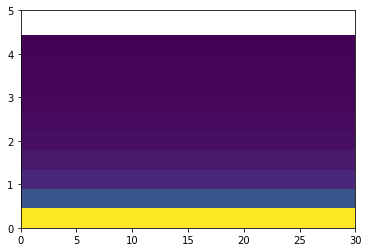

In [8]:
from matplotlib import pyplot as plt
plt.hist2d(theta_e_list,theta_mu_list)
plt.xlim((0,30))
plt.ylim((0,5))